In [2]:
import rasterio as rio

dem_path='C:/Users/USER/Desktop/smart_city_seungmin/35816(김해)/35816020.img'
dem_data=rio.open(dem_path)


# print(dem_data.count)
# print(dem_data.read(1))
print(dem_data.crs)
print(dem_data.count)
print(dem_data.height)
print(dem_data.width)
print(dem_data)
dem_data.crs.from_epsg(4356)
print(dem_data.crs)
print(dem_data.count)
print(dem_data.height)
print(dem_data.width)
print(dem_data)



PROJCS["Transverse Mercator",GEOGCS["Geocentric_datum_of_Korea",DATUM["Geocentric_datum_of_Korea",SPHEROID["GRS 1980",6378137,298.257222101004],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["meters",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
1
2920
2430
<open DatasetReader name='C:/Users/USER/Desktop/smart_city_seungmin/35816(김해)/35816020.img' mode='r'>
PROJCS["Transverse Mercator",GEOGCS["Geocentric_datum_of_Korea",DATUM["Geocentric_datum_of_Korea",SPHEROID["GRS 1980",6378137,298.257222101004],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAM

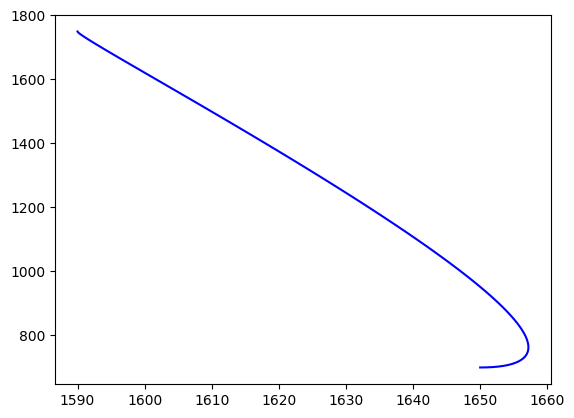

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 시작점과 끝점
P0 = np.array([1650, 700])
P1 = np.array([1590, 1750])

# 시작점과 끝점에서의 접선 방향 벡터 (임의의 값으로 설정)
M0 = np.array([100, 0])
M1 = np.array([0, 100])

# t 값 생성 (0부터 1까지)
t_values = np.linspace(0.0, 1.0, 100)

# 에르미트 곡선 상의 점 초기화
H = []

# 각 t 값에 대해 에르미트 곡선 상의 점 계산
for t in t_values:
    point = (
        (2 * t**3 - 3 * t**2 + 1) * P0 +
        (t**3 - 2 * t**2 + t) * M0 +
        (-2 * t**3 + 3 * t**2) * P1 +
        (t**3 - t**2) * M1
    )
    H.append(point)

# H를 NumPy 배열로 변환
H = np.array(H)

# 점을 scatter로 그리기
plt.scatter([P0[0], P1[0]], [P0[1], P1[1]], c='white', marker='o', s=50)

# 에르미트 곡선 그리기
plt.plot(H[:, 0], H[:, 1], c='blue')

# 그래프 표시
plt.show()

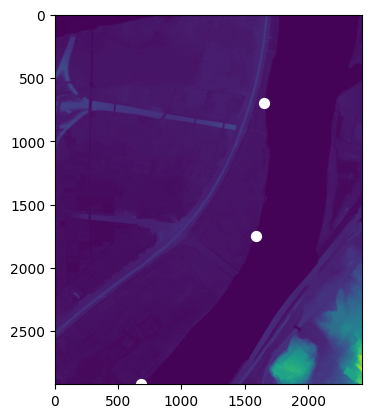

In [3]:
from matplotlib import pyplot as plt
from matplotlib.bezier import BezierSegment
import numpy as np

# 이미지 표시
plt.imshow(dem_data.read(1))

#세점 좌표에 대한 곡선 정의
points = np.array([[1650,750],[1590,1750],[680,2919]])

#bezier커브를 이용한 점 표시

bezier = BezierSegment(points)
print(bezier)
#곡선 그리기
# num_points_on_curve = 100
# curve_poits = []

# for t in np.linspace(0,1, num_points_on_curve):
#     curve_points=np.append(bezier(t))

# plt.plot(curve_points[:, 0], curve_points[:, 1], '-b')

# # 좌표 (750, 0)에 흰색 점 찍기
plt.scatter(1650, 700, c='white', marker='o', s=50)  # c는 색상, marker는 마커 모양, s는 크기입니다.
plt.scatter(1590, 1750, c='white', marker='o', s=50)
plt.scatter(680, 2919, c='white', marker='o', s=50)
# # 그래프 표시


plt.show()

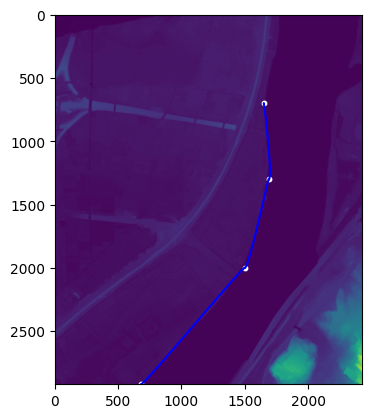

In [84]:
from matplotlib import pyplot as plt
from matplotlib.bezier import BezierSegment
import numpy as np



def hermite_curve(P0, P1, M0, M1, num_points=100):
    # t 값 생성 (0부터 1까지)
    t_values = np.linspace(0.0, 1.0, num_points)

    # 에르미트 곡선 상의 점 초기화
    H = []

    # 각 t 값에 대해 에르미트 곡선 상의 점 계산
    for t in t_values:
        point = (
            (2 * t**3 - 3 * t**2 + 1) * P0 +
            (t**3 - 2 * t**2 + t) * M0 +
            (-2 * t**3 + 3 * t**2) * P1 +
            (t**3 - t**2) * M1
        )
        H.append(point)

    # H를 NumPy 배열로 변환
    H = np.array(H)
    
    return H


# 시작점과 끝점
P0 = np.array([1650, 700])
# P1 = np.array([1690, 1300])
P2 = np.array([1500, 2000])
P3 = np.array([680, 2919])

# 시작점과 끝점에서의 접선 방향 벡터 (임의의 값으로 설정) 곡률
M0 = np.array([100, 0])
M1 = np.array([0, 100])

plt.imshow(dem_data.read(1))
# t 값 생성 (0부터 1까지)
plt.scatter(1650, 700, c='white', marker='o', s=10)  # c는 색상, marker는 마커 모양, s는 크기입니다.
plt.scatter(1690, 1300, c='white', marker='o', s=10)
plt.scatter(1500, 2000, c='white', marker='o', s=10)
plt.scatter(680, 2919, c='white', marker='o', s=10)


#에르미트 곡선 그리기
for P_start, P_end in [(P3, P2), (P2, P1), (P1, P0)]:
    
    H = hermite_curve(P_start, P_end, M0, M1)
    plt.plot(H[:, 0], H[:, 1], c='blue')

# for P_start, P_end in [(P1, P0),(P3, P2)]:
#     H = hermite_curve(P_start, P_end, M0, M1)
#     plt.plot(H[:, 0], H[:, 1], c='blue')



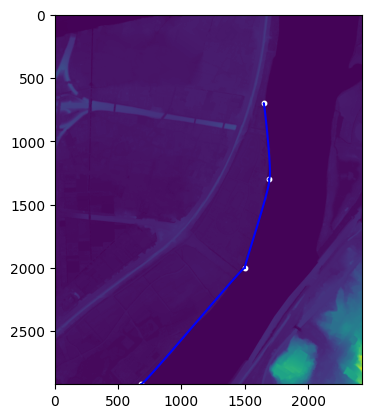

In [83]:
from matplotlib import pyplot as plt
from matplotlib.bezier import BezierSegment
import numpy as np



def hermite_curve(P0, P1, M0, M1, num_points=100):
    # t 값 생성 (0부터 1까지)
    t_values = np.linspace(0.0, 1.0, num_points)

    # 에르미트 곡선 상의 점 초기화
    H = []

    # 각 t 값에 대해 에르미트 곡선 상의 점 계산
    for t in t_values:
        point = (
            (2 * t**3 - 3 * t**2 + 1) * P0 +
            (t**3 - 2 * t**2 + t) * M0 +
            (-2 * t**3 + 3 * t**2) * P1 +
            (t**3 - t**2) * M1
        )
        H.append(point)

    # H를 NumPy 배열로 변환
    H = np.array(H)
    
    return H


# 시작점과 끝점
P0 = np.array([1650, 700])
# P1 = np.array([1690, 1300])
P2 = np.array([1500, 2000])
P3 = np.array([680, 2919])

# 시작점과 끝점에서의 접선 방향 벡터 (임의의 값으로 설정) 곡률
M0 = np.array([100, 0])
M1 = np.array([0, 100])

plt.imshow(dem_data.read(1))
# t 값 생성 (0부터 1까지)
plt.scatter(1650, 700, c='white', marker='o', s=10)  # c는 색상, marker는 마커 모양, s는 크기입니다.
plt.scatter(1690, 1300, c='white', marker='o', s=10)
plt.scatter(1500, 2000, c='white', marker='o', s=10)
plt.scatter(680, 2919, c='white', marker='o', s=10)


#에르미트 곡선 그리기
for P_start, P_end in [(P1, P0), (P1, P2), (P3, P2)]:
    
    H = hermite_curve(P_start, P_end, M0, M1)
    plt.plot(H[:, 0], H[:, 1], c='blue')

# for P_start, P_end in [(P1, P0),(P3, P2)]:
#     H = hermite_curve(P_start, P_end, M0, M1)
#     plt.plot(H[:, 0], H[:, 1], c='blue')



In [18]:
import geopandas as gpd
import rasterio as rio
import pyproj

# DEM 데이터 경로 설정
dem_path = 'C:/Users/USER/Desktop/smart_city_seungmin/35816(김해)/35816020.img'
dem_data=rio.open(dem_path)
wgs84=pyproj.CRS("EPSG:4326")
tm=pyproj.CRS(dem_data.crs)
transformer=pyproj.Transformer.from_crs(wgs84,tm,always_xy=True)

def Get_WGS84(longitude,latitude):
    return transformer.transform(longitude,latitude)


print(Get_WGS84)

<function Get_WGS84 at 0x0000022E600155A0>
